In [1]:
import csv 
import numpy as np 
import pandas as pd
import pyomo.environ as pe
import matplotlib.pyplot as plt

# Predicted Price

In [2]:
pred_ret_Linear = pd.read_csv("..\..\data\Linear_pred.csv")

In [3]:
pred_ret_Linear = pred_ret_Linear.drop(['Unnamed: 0'], axis=1)

In [4]:
pred_ret_LASSO = pd.read_csv("..\..\data\LASSO_pred.csv")

In [5]:
pred_ret_LASSO = pred_ret_LASSO.drop(['Unnamed: 0'], axis=1)

In [6]:
pred_ret_RF = pd.read_csv("..\..\data\RF_pred.csv")

In [7]:
pred_ret_RF = pred_ret_RF.drop(['Unnamed: 0'], axis=1)

In [8]:
pred_ret_SVR_lin = pd.read_csv("..\..\data\SVR_lin_pred.csv")

In [9]:
pred_ret_SVR_lin = pred_ret_SVR_lin.drop(['Unnamed: 0'], axis=1)

In [10]:
pred_ret_SVR_poly = pd.read_csv("..\..\data\SVR_poly_pred.csv")

In [11]:
pred_ret_SVR_poly = pred_ret_SVR_poly.drop(['Unnamed: 0'], axis=1)

In [12]:
pred_ret_SVR_rbf = pd.read_csv("..\..\data\SVR_rbf_pred.csv")

In [13]:
pred_ret_SVR_rbf = pred_ret_SVR_rbf.drop(['Unnamed: 0'], axis=1)

In [14]:
pred_ret_GRU = pd.read_csv("..\..\data\GRU_pred.csv")

In [15]:
pred_ret_GRU = pred_ret_GRU.drop(['Unnamed: 0'], axis=1)

In [16]:
pred_ret_LSTM = pd.read_csv("..\..\data\LSTM_pred(1).csv")
pred_ret_LSTM = pred_ret_LSTM.drop(['Unnamed: 0'], axis=1)

# Real Price

In [17]:
real_price = pd.read_csv("..\..\data\stock return.csv")
stocklist = ['600131.SH','600197.SH','600185.SH','600329.SH','600409.SH','600486.SH','600507.SH','600557.SH','600563.SH',
             '600612.SH','600742.SH','600755.SH','600802.SH','600835.SH','600846.SH','601139.SH']

real_price = real_price[stocklist]

# Real Return

In [18]:
real_ret = real_price.copy()
for stock in real_ret.columns[:]:
    for i in range(596):
        real_ret[str(stock)][i] = real_price[str(stock)][i+1]/real_price[str(stock)][i] - 1

In [19]:
real_ret = real_ret.drop(labels = 596,axis = 0)
real_ret = real_ret.reset_index(drop = True)
real_ret

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,0.054135,-0.027978,0.008969,-0.046944,0.022432,-0.009361,0.036673,-0.026983,0.016368,0.001451,0.004669,0.038889,0.051378,0.019316,0.014455,0.009967
1,0.017118,0.055556,0.037778,0.030785,0.016166,0.028687,0.031924,0.027731,-0.016854,0.003187,0.037175,0.008021,0.053635,0.013535,0.040155,-0.011513
2,0.042076,0.002089,-0.008565,0.010951,0.007955,-0.018701,0.025084,0.001635,-0.009714,-0.001155,-0.012545,-0.009284,-0.007919,0.001068,-0.011208,0.000000
3,0.075370,-0.025010,0.006479,0.004431,-0.029312,-0.014711,-0.015498,-0.008163,-0.009810,-0.022261,0.010889,-0.002677,-0.013683,-0.012807,0.005038,0.001664
4,0.048811,0.036340,0.010730,0.004902,-0.003484,-0.023074,0.020713,-0.017284,-0.018648,-0.013010,-0.005386,-0.008054,-0.010405,-0.003243,-0.015038,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.004298,-0.039683,-0.079118,0.011641,0.040314,-0.003037,0.014881,-0.030027,0.047082,0.004267,-0.009000,0.016794,0.005013,-0.003455,0.008642,0.024523
592,0.011412,0.088279,-0.084507,-0.018082,-0.041981,-0.017517,-0.010264,-0.038462,0.000288,-0.009168,-0.001009,-0.010511,-0.016209,-0.047053,-0.004896,0.007979
593,-0.001410,-0.045219,0.006154,-0.017857,-0.039326,-0.004651,-0.014815,0.003902,-0.021324,0.006545,-0.024242,0.003035,0.040558,0.005717,0.002460,-0.036939
594,-0.011299,0.028923,0.097859,0.000568,0.100585,0.004673,0.051128,-0.011662,0.061930,-0.002242,0.001035,0.004539,-0.010962,0.002067,0.003681,0.000000


# MAD

In [24]:
def MAD_optimize(t, money, pred_ret):
    
    ad = pred_ret_Linear.copy()
    for stock in stocklist:
        ad_list = []
        for j in range(100):
            ad_num = (np.mean(real_ret[stock][t:t+100])- real_ret[stock][t+j])
            ad[stock][j] = np.mean(ad_num)
    
    
    MAD_money = []
    ad_pred = ad.iloc[t]
    ret_pred = pred_ret.iloc[t]
    
    # create the model
    model_MAD = pe.ConcreteModel()
    
    # define the decision variables
    n = len(stocklist)
    model_MAD.m = pe.Var(range(n), domain = pe.Reals)
    model_MAD.y = pe.Var(range(100), domain = pe.Reals)

    #declare the objective function
    model_MAD.MAD = pe.Objective(
        expr = sum(model_MAD.y[j] for j in range(100))/100, 
        sense = pe.minimize) 
    
    ret_targ = sum(ret_pred.iloc[i] for i in range(n)) / len(stocklist)
    
    # declare constraints
    ## constraints of return
    model_MAD.ret = pe.Constraint(
        expr = sum(ret_pred[i] * model_MAD.m[i] for i in range(len(stocklist))) >= ret_targ * money)
    
    ## constrains of money
    model_MAD.money = pe.Constraint(
        expr = sum(model_MAD.m[i] for i in range(n)) == money)
    
    # constraint: short selling size
    lend = -abs(money)/16
    def rule1(mod, i):
        return mod.m[i] >= lend
    model_MAD.short = pe.Constraint(range(n), rule = rule1)
    
    
    # constraint: absolute value
    model_MAD.AD1 = pe.Constraint(
        range(100), rule = lambda mod, j: mod.y[j] >= sum(
            mod.m[i]*ad.iloc[j][i] for i in range(len(stocklist)))) 

    model_MAD.AD2 = pe.Constraint(
        range(100), rule = lambda mod, j: mod.y[j] >= -sum(
            mod.m[i]*ad.iloc[j][i] for i in range(len(stocklist))))

    
    # solve the model
    solver = pe.SolverFactory('gurobi')
    solver.solve(model_MAD)
    
    for i in range(len(stocklist)):
        MAD_money.append(model_MAD.m[i].value)

    return MAD_money
    

# Linear

In [26]:
money = 1

Linear_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_Linear)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_Linear.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = Linear_opt_money_list[t - 1]
        else:
            money = money    
    Linear_opt_money_list.append(money)
print(t, money)
    
    

495 1.9438299933714922


# LASSO

In [27]:
money = 1

LASSO_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_LASSO)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_LASSO.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = LASSO_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    LASSO_opt_money_list.append(money)
print(t, money)
    
    

495 1.7185651605863033


# RF

In [28]:
money = 1

RF_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_RF)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_RF.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = RF_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    RF_opt_money_list.append(money)
print(t, money)
    
    

495 2.0431890501095604


# SVR_lin

In [29]:
money = 1

SVR_lin_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_SVR_lin)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_SVR_lin.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = SVR_lin_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    SVR_lin_opt_money_list.append(money)
print(t, money)
    
    

495 1.8209722816808513


# SVR_poly

In [30]:
money = 1

SVR_poly_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_SVR_poly)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_SVR_poly.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = SVR_poly_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    SVR_poly_opt_money_list.append(money)
print(t, money)
    
    

495 1.6409469468762234


# SVR_rbf

In [31]:
money = 1

SVR_rbf_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_SVR_rbf)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_SVR_rbf.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = SVR_rbf_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    SVR_rbf_opt_money_list.append(money)
print(t, money)
    
    

495 1.680206404120964


In [32]:
money = 1

GRU_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_GRU)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_GRU.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = GRU_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    GRU_opt_money_list.append(money)
print(t, money)
    
    

495 41.29492723072039


In [33]:
money = 1

LSTM_opt_money_list = []
money_allocation_list = []

for t in range(496):
    opt_money_allocation = MAD_optimize(t, money, pred_ret_LSTM)
    opt_pred_money = sum(opt_money_allocation * (1 + pred_ret_LSTM.iloc[t]))
    opt_real_money = sum(opt_money_allocation * (1 + real_ret.iloc[t+100]))
    if opt_pred_money > money:
        money_allocation = opt_money_allocation
        money = opt_real_money
    else:
        money_allocation = np.zeros(16)
        if t >= 1:
            money = LSTM_opt_money_list[t - 1]
        else:
            money = money
    money_allocation_list.append(money_allocation)        
    LSTM_opt_money_list.append(money)
print(t, money)
    
    

495 40.955456948421656


# Equally Weighted

In [34]:
money = 1

money_list = []
money_allocation = np.zeros(16)+1/16
for t in range(496):
    money_allocation = (np.zeros(16)+1/16) * money
    money = sum(money_allocation * (1 + real_ret.iloc[t+100]))
    money_allocation_list.append(money_allocation)        
    money_list.append(money)
print(t, money)
    

495 1.6776509998927018


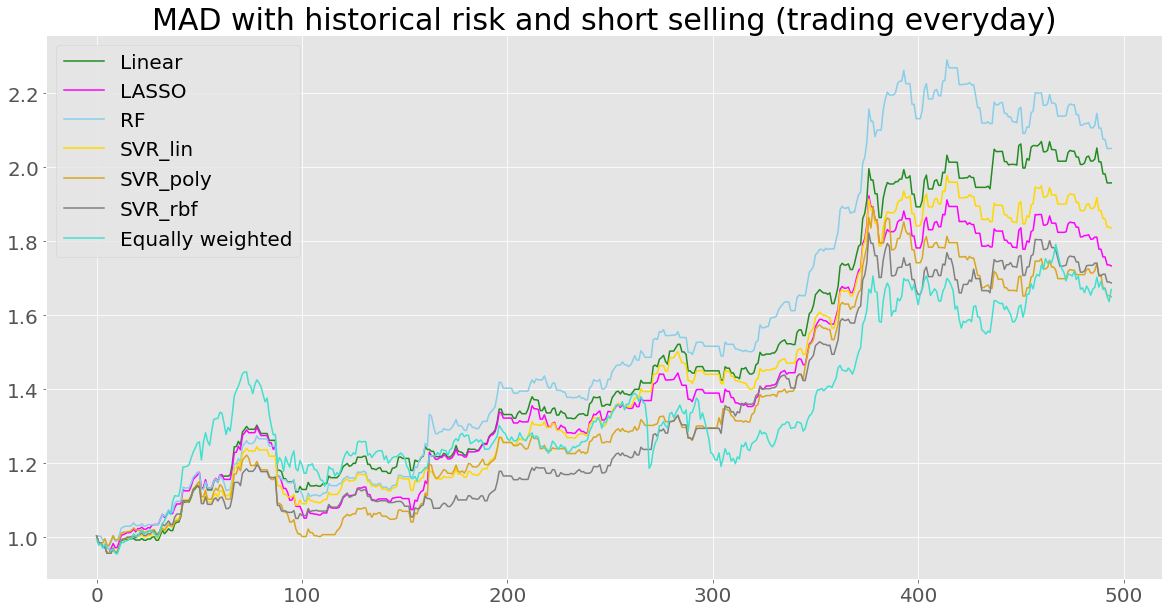

In [35]:
# plot
cnames = [
'forestgreen',
'fuchsia',
'skyblue',
'gold',
'goldenrod',
'gray',
'turquoise']

result_list = [Linear_opt_money_list, LASSO_opt_money_list, RF_opt_money_list, SVR_lin_opt_money_list, SVR_poly_opt_money_list,
          SVR_rbf_opt_money_list, money_list]
method_names = ['Linear', 'LASSO', 'RF', 'SVR_lin', 'SVR_poly', 'SVR_rbf', 'Equally weighted']


plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')
for i in range(len(result_list)):
    plt.plot(result_list[i][:495],color = cnames[i], label = method_names[i])
plt.title('MAD with historical risk and short selling (trading everyday)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('..\..\data\MAD with historical risk and short selling 1day.png')
plt.show()

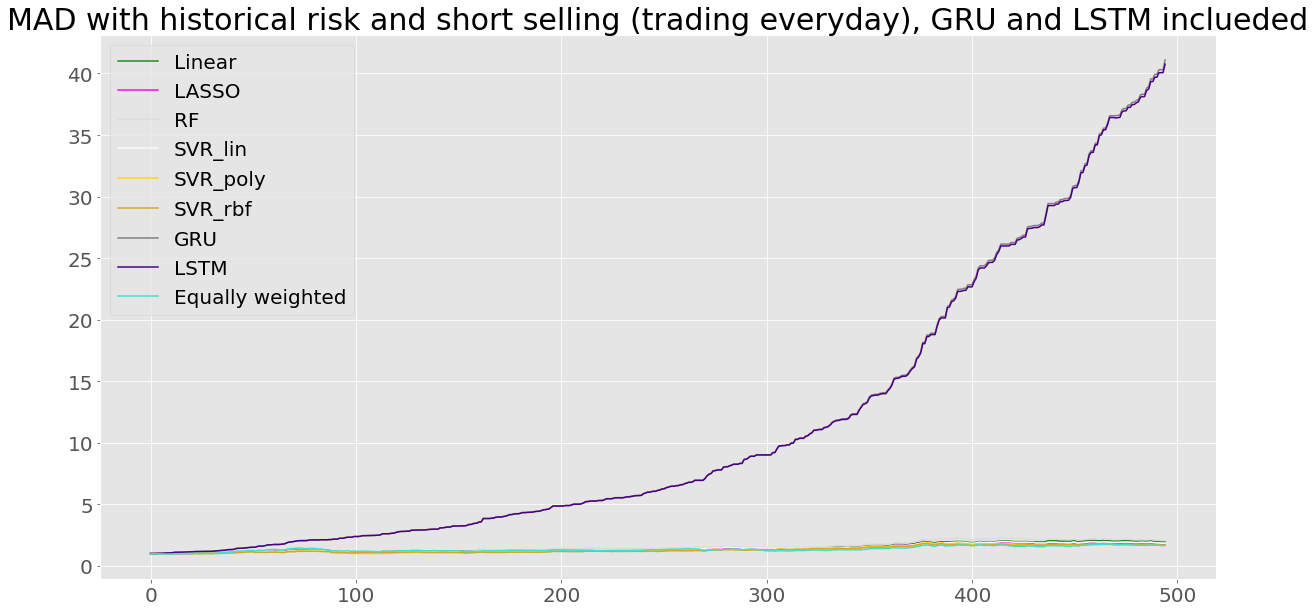

In [36]:
# plot
cnames = [
'forestgreen',
'fuchsia',
'gainsboro',
'ghostwhite',
'gold',
'goldenrod',
'gray',
'indigo',
'turquoise',
'forestgreen',
'fuchsia']

result_list = [Linear_opt_money_list, LASSO_opt_money_list, RF_opt_money_list, SVR_lin_opt_money_list, SVR_poly_opt_money_list,
          SVR_rbf_opt_money_list,  GRU_opt_money_list, LSTM_opt_money_list, money_list]
method_names = ['Linear', 'LASSO', 'RF', 'SVR_lin', 'SVR_poly', 'SVR_rbf', 'GRU', 'LSTM', 'Equally weighted' ]

for i in range(len(result_list)):
    plt.plot(result_list[i][:495] ,color = cnames[i] ,label = method_names[i])

plt.title('MAD with historical risk and short selling (trading everyday), GRU and LSTM inclueded',fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('..\..\data\MAD with historical risk and short selling 1day_GRU and LSTM inclueded.png')
plt.show()